# <h1 align="center"><font color = #119fbf>Lighthouse | Cientista de Dados | Indicium 🌎🚀</font></h1>

*Andressa Gomes Moreira - andressagomesm26@gmail.com*

## <a><font color = #119fbf>Modelagem</font></a>
A etapa de modelagem dos dados consiste na criação do modelo preditivo para definir um algoritmo que resolva o problema de negócio.

## <a><font color = #119fbf>Objetivo</font></a>
Nesse desafio, o objetivo é prever o preço dos veículos a partir dos dados enviados. Portanto, temos um problema de aprendizado supervisionado, na qual, temos a disponibilidade de dados anotados. Dessa forma, como queremos prever os rótulos de saída contínuos, referente ao preço dos veículos, usaremos o conceito de regressão.

## <a><font color = #119fbf>Descrição dos Dados</font></a>
Serão utilizados dois datasets:

    1. Um dataset para treinamento chamado cars_training composto por 29584 linhas, 28 colunas de informação (features) e a variável a ser prevista (“preco”).
    2. Um segundo dataset para teste chamado de cars_test composto por 9862 linhas e 28 colunas, sendo que este dataset não possui a coluna “preco”.


## <a><font color = #119fbf>Avaliação</font></a>
Para avaliar a perfomace e desempenho dos algoritmos de regressão será utilzada a métrica Root Mean Squared Erro (RMSE). A métrica fornece a média dos erros em unidades originais da variável de resposta. Dessa forma, quanto menor o valor, melhor é o desempenho do modelo, indicando uma maior precisão nas previsões.

## Importações

**Importações das bibliotecas**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import statistics as sts
import joblib

import sklearn
from sklearn.preprocessing    import MinMaxScaler
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model     import LinearRegression
from sklearn.tree             import DecisionTreeRegressor
from sklearn.decomposition    import PCA

import warnings
warnings.filterwarnings('ignore')

**Carregamento dos dados de treinamento e teste**

In [2]:
df_train = pd.read_csv('../dataset/cars_train.csv', sep=',')
df_teste = pd.read_csv('../dataset/cars_test.csv', sep=',')

In [3]:
df_train.head(3)

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472


In [4]:
df_teste.head(3)

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado
0,13518783164498355150900635905895481162,8.0,NISSAN,VERSA,1.6 16V FLEXSTART V-DRIVE MANUAL,2021,2021.0,20258.0,Manual,4,...,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN
1,299896161723793383246777788797566040330,18.0,FIAT,STRADA,1.4 MPI WORKING CS 8V FLEX 2P MANUAL,2021,2021.0,53045.0,Manual,2,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
2,316180649972302128246133616457018378621,8.0,AUDI,Q5,2.0 TFSI GASOLINA BLACK S TRONIC,2018,2019.0,32486.0,Automática,4,...,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN


## Tratamento de Valores Nulos

In [5]:
df_train.isnull().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
dtype: int64

In [6]:
df_teste.isnull().sum()

id                            0
num_fotos                    60
marca                         0
modelo                        0
versao                        0
ano_de_fabricacao             0
ano_modelo                    0
hodometro                     0
cambio                        0
num_portas                    0
tipo                          0
blindado                      0
cor                           0
tipo_vendedor                 0
cidade_vendedor               0
estado_vendedor               0
anunciante                    0
entrega_delivery              0
troca                         0
elegivel_revisao              0
dono_aceita_troca          2554
veiculo_único_dono         6387
revisoes_concessionaria    6795
ipva_pago                  3298
veiculo_licenciado         4518
garantia_de_fábrica        8439
revisoes_dentro_agenda     7869
veiculo_alienado           9862
dtype: int64

In [7]:
def missing_values(df):
    """Realiza o tratamento dos valores missing no DataFrame

    Args:
        df (DataFrame): Dataframe para tratamento (df_train / df_teste)

    Returns:
        None
    """

    colunas = ['dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda']
    values = ['Nao aceita troca', 'Não é único dono', 'Não possui todas as revisoes feitas pela concessionaria', 'ipva não pago', 'Não Licenciado', 'Não possui garantia de fábrica', 'não possui todas as revisões feitas pela agenda do carro']

    for i, coluna in enumerate(colunas):
        df[coluna] = df[coluna].replace(np.nan, values[i])

    df['num_fotos'].fillna(sts.median(df['num_fotos']), inplace=True)

In [8]:
missing_values(df_train)
missing_values(df_teste)

In [9]:
df_train.isnull().sum()

id                             0
num_fotos                      0
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca              0
veiculo_único_dono             0
revisoes_concessionaria        0
ipva_pago                      0
veiculo_licenciado             0
garantia_de_fábrica            0
revisoes_dentro_agenda         0
veiculo_alienado           29584
preco                          0
dtype: int64

## Tratamento de Valores Duplicados

In [10]:
print(f'Quantidade de dados duplicados no dataset de treinamento: {df_train.duplicated().sum()}')
print(f'Quantidade de dados duplicados no dataset de teste: {df_teste.duplicated().sum()}')

Quantidade de dados duplicados no dataset de treinamento: 0
Quantidade de dados duplicados no dataset de teste: 0


### Drop atributos

* Excluir as colunas 'id' e 'veiculo_alienado'

In [11]:
df_train = df_train.drop('id', axis=1)
df_train = df_train.drop('veiculo_alienado', axis=1)

In [12]:
id_df_teste = df_teste['id']

df_teste = df_teste.drop('id', axis=1)
df_teste = df_teste.drop('veiculo_alienado', axis=1)

## Codificação de Dados Categóricos



### Encoder

In [13]:
def var_categoricas(df):
    """Realiza a codificação das variáveis categóricas binárias

    Args:
        df (DataFrame): Dataframe para tratamento (df_train / df_teste)

    Returns:
        None
    """

    df['entrega_delivery'].replace([True,  False],[0,1],inplace=True)
    df['troca'].replace([True,  False],[0,1],inplace=True)
    df['elegivel_revisao'].replace([True,  False],[0,1],inplace=True)
    df['blindado'].replace(['N','S'],[0,1],inplace=True)
    df['tipo_vendedor'].replace(['PF', 'PJ'],[0,1],inplace=True)
    df['dono_aceita_troca'].replace(['Aceita troca', 'Nao aceita troca'],[0,1],inplace=True)
    df['veiculo_único_dono'].replace(['Único dono', 'Não é único dono'],[0,1],inplace=True)
    df['revisoes_concessionaria'].replace(['Todas as revisões feitas pela concessionária', 'Não possui todas as revisoes feitas pela concessionaria'],[0,1],inplace=True)
    df['ipva_pago'].replace(['IPVA pago', 'ipva não pago'],[0,1],inplace=True)
    df['veiculo_licenciado'].replace(['Licenciado', 'Não Licenciado'],[0,1],inplace=True)
    df['garantia_de_fábrica'].replace(['Garantia de fábrica', 'Não possui garantia de fábrica'],[0,1],inplace=True)
    df['revisoes_dentro_agenda'].replace(['Todas as revisões feitas pela agenda do carro', 'não possui todas as revisões feitas pela agenda do carro'],[0,1],inplace=True)

In [14]:
var_categoricas(df_train)
var_categoricas(df_teste)

### One-hot-encoding

In [15]:
def cat_unique(df):
    """Adiciona os valores únicos do DataFrame em um array

    Args:
        df (DataFrame): Dataframe

    Returns:
        val_unique (array): Valores únicos do DataFrame
    """

    colunas = ['marca', 'modelo', 'versao', 'tipo', 'cor', 'cidade_vendedor', 'estado_vendedor', 'cambio', 'anunciante']
    val_unique = []

    for coluna in colunas:
        val_unique.append(set(df[coluna].unique()))

    return val_unique

union_cat_train = cat_unique(df_train)
union_cat_teste = cat_unique(df_teste)

In [16]:
def union_cat(union_cat_train, union_cat_teste):
    """Realiza uma operação de união entre os valores únicos do DataFrame de treinamento e de teste.

    Args:
        union_cat_train (array): Valores únicos do DataFrame de treinamento (df_train)
        union_cat_teste (array): Valores únicos do DataFrame de teste (df_teste)

    Returns:
        union_cat_resultado (array): Array com os valores únicos do DataFrame de treinamento e de teste.
    """
    colunas = ['marca', 'modelo', 'versao', 'tipo', 'cor', 'cidade_vendedor', 'estado_vendedor', 'cambio', 'anunciante']
    union_cat_resultado = []

    for i, coluna in enumerate(colunas):
        union_cat_resultado.append(union_cat_train[i].union(union_cat_teste[i]))

    return union_cat_resultado

union_categories = union_cat(union_cat_train, union_cat_teste)

In [17]:
def atualiza_dataset(df, union_categories):
    """ Atualiza os DataFrames com as categorias unificadas

    Args:
        df (DataFrame): Dataframe (df_train ou df_teste)
        union_cat_resultado (array): Valores únicos do DataFrame de treinamento e de teste.

    Returns:
        None
    """

    colunas = ['marca', 'modelo', 'versao', 'tipo', 'cor', 'cidade_vendedor', 'estado_vendedor', 'cambio', 'anunciante']

    for i, coluna in enumerate(colunas):
        df[coluna] = df[coluna].astype('category').cat.set_categories(union_categories[i])

atualiza_dataset(df_train, union_categories)
atualiza_dataset(df_teste, union_categories)

In [18]:
# Aplica o one-hot encoding no Dataframe de treinamento e de  teste
train_encoded = pd.get_dummies(df_train)
test_encoded = pd.get_dummies(df_teste)

In [19]:
train_encoded.head()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,blindado,tipo_vendedor,entrega_delivery,troca,elegivel_revisao,...,estado_vendedor_Tocantins (TO),estado_vendedor_Maranhão (MA),estado_vendedor_São Paulo (SP),estado_vendedor_Alagoas (AL),estado_vendedor_Rio Grande do Sul (RS),estado_vendedor_Santa Catarina (SC),anunciante_Pessoa Física,anunciante_Concessionária,anunciante_Acessórios e serviços para autos,anunciante_Loja
0,8.0,2017,2017.0,67772.0,4,0,0,1,1,1,...,0,0,1,0,0,0,1,0,0,0
1,8.0,2017,2017.0,62979.0,4,0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
2,16.0,2018,2019.0,44070.0,4,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
3,14.0,2013,2015.0,85357.0,4,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,8.0,2013,2015.0,71491.0,4,0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0


In [20]:
test_encoded.head()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,blindado,tipo_vendedor,entrega_delivery,troca,elegivel_revisao,...,estado_vendedor_Tocantins (TO),estado_vendedor_Maranhão (MA),estado_vendedor_São Paulo (SP),estado_vendedor_Alagoas (AL),estado_vendedor_Rio Grande do Sul (RS),estado_vendedor_Santa Catarina (SC),anunciante_Pessoa Física,anunciante_Concessionária,anunciante_Acessórios e serviços para autos,anunciante_Loja
0,8.0,2021,2021.0,20258.0,4,0,0,1,1,1,...,0,0,1,0,0,0,1,0,0,0
1,18.0,2021,2021.0,53045.0,2,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,8.0,2018,2019.0,32486.0,4,0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
3,16.0,2019,2020.0,24937.0,4,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
4,8.0,2019,2019.0,62074.0,4,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1


## Normalização dos dados

In [21]:
def normalizacao(df_encoded):
    """Realiza a normalização das variáveis numéricas

    Args:
        df (DataFrame): Dataframe

    Returns:
        None
    """
    norm = MinMaxScaler()

    colunas = ['num_fotos', 'ano_de_fabricacao', 'ano_modelo', 'hodometro', 'num_portas']

    for coluna in colunas:
        df_encoded[coluna] = norm.fit_transform(df_encoded[coluna].values.reshape(-1, 1))

In [22]:
normalizacao(train_encoded)
normalizacao(test_encoded)

In [23]:
train_encoded.head()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,blindado,tipo_vendedor,entrega_delivery,troca,elegivel_revisao,...,estado_vendedor_Tocantins (TO),estado_vendedor_Maranhão (MA),estado_vendedor_São Paulo (SP),estado_vendedor_Alagoas (AL),estado_vendedor_Rio Grande do Sul (RS),estado_vendedor_Santa Catarina (SC),anunciante_Pessoa Física,anunciante_Concessionária,anunciante_Acessórios e serviços para autos,anunciante_Loja
0,0.000000,0.864865,0.769231,0.173534,1.0,0,0,1,1,1,...,0,0,1,0,0,0,1,0,0,0
1,0.000000,0.864865,0.769231,0.161243,1.0,0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
2,0.615385,0.891892,0.846154,0.112754,1.0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
3,0.461538,0.756757,0.692308,0.218627,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0.000000,0.756757,0.692308,0.183070,1.0,0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0


In [24]:
train_encoded.head()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,blindado,tipo_vendedor,entrega_delivery,troca,elegivel_revisao,...,estado_vendedor_Tocantins (TO),estado_vendedor_Maranhão (MA),estado_vendedor_São Paulo (SP),estado_vendedor_Alagoas (AL),estado_vendedor_Rio Grande do Sul (RS),estado_vendedor_Santa Catarina (SC),anunciante_Pessoa Física,anunciante_Concessionária,anunciante_Acessórios e serviços para autos,anunciante_Loja
0,0.000000,0.864865,0.769231,0.173534,1.0,0,0,1,1,1,...,0,0,1,0,0,0,1,0,0,0
1,0.000000,0.864865,0.769231,0.161243,1.0,0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
2,0.615385,0.891892,0.846154,0.112754,1.0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
3,0.461538,0.756757,0.692308,0.218627,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0.000000,0.756757,0.692308,0.183070,1.0,0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0


## Separação da base de dados

In [25]:
X = train_encoded.drop('preco', axis=1)
y = train_encoded['preco']

##  Análise de Componentes Principais (PCA)

In [26]:
# Número de componentes
pca = PCA(n_components=2)

In [27]:
X_pca_train = pca.fit_transform(X)
X_pca_train

array([[-1.03156591,  0.18985095],
       [-0.31468981, -0.90810652],
       [ 1.35003113,  0.0393136 ],
       ...,
       [-0.18167713, -1.25569856],
       [ 0.96969784,  1.27185168],
       [ 0.86831478, -0.85055259]])

In [28]:
X_pca_teste = pca.fit_transform(test_encoded)
X_pca_teste

array([[-0.48134522,  0.00428619],
       [ 0.97440733,  0.69404259],
       [-0.33991979, -1.01142142],
       ...,
       [-1.03877059, -0.09630821],
       [ 0.68318398,  1.53768745],
       [-0.31453818, -1.36731838]])

## Validação Cruzada

> Análise dos modelos

### Regressão Linear

In [29]:
model_regressao_linear = LinearRegression()
rmse_rl = cross_val_score(estimator=model_regressao_linear, X= X_pca_train, y=y, cv=10, scoring='neg_root_mean_squared_error')

Root Mean Squared Erro (RMSE) - Regressão Linear

In [30]:
rmse_rl = rmse_rl * -1
rmse_rl

array([79547.93213097, 81140.97584767, 85992.50830485, 82584.22977949,
       78675.83595569, 83288.10634173, 79242.23146618, 80468.9766309 ,
       77758.20052828, 79895.17210905])

In [31]:
rmse_rl_mean = rmse_rl.mean()
rmse_rl_mean

80859.41690948178

### Decision Tree Regressor

In [32]:
model_decision_tree_rg = DecisionTreeRegressor()

rmse_dt = cross_val_score(estimator=model_decision_tree_rg, X=X_pca_train, y=y, cv=10, scoring='neg_root_mean_squared_error')

Root Mean Squared Erro (RMSE) - Decision Tree Regressor

In [33]:
rmse_dt = rmse_dt * -1
rmse_dt

array([101925.87427452,  99659.01334847, 103178.78839145, 103701.05844807,
       101149.28039971, 102258.92441899,  97126.63326272,  94654.38841397,
       100291.12790579, 101257.7256824 ])

In [34]:
rmse_dt_mean = rmse_dt.mean()
rmse_dt_mean

100520.2814546088

**Comparação dos valores RMSE**

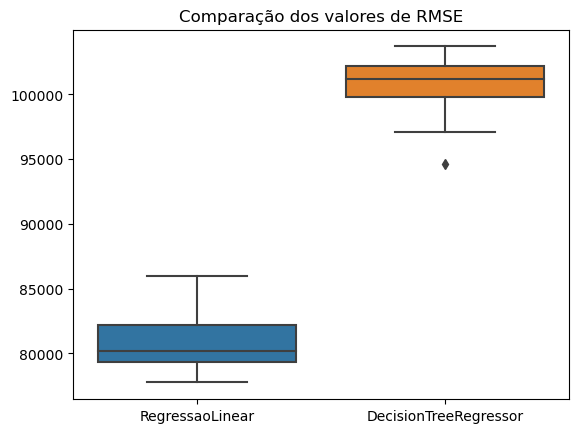

In [35]:
rmse = pd.DataFrame({'RegressaoLinear': rmse_rl, 'DecisionTreeRegressor' : rmse_dt})
sns.boxplot(data = rmse).set_title('Comparação dos valores de RMSE');

**Portanto, o modelo escolhido para treinamento será Regressão Polinomial, pois obteve o menor valor médio para a métrica RMSE**

## Treinamento do modelo

In [36]:
model_regressao_linear.fit(X_pca_train, y)

LinearRegression()

**Valores preditos pelo modelo**

In [37]:
y_pred = model_regressao_linear.predict(X_pca_teste)
y_pred[:5]

array([137612.64983639, 118786.92153689, 143406.95582681, 116950.55981928,
       121427.63148725])

In [38]:
joblib.dump(model_regressao_linear, '../models/model_regressao_linear.pkl')

['../models/model_regressao_linear.pkl']

## Resultado Final do modelo

In [39]:
id_df_teste = id_df_teste.reset_index()

In [40]:
df_predicted= pd.DataFrame()
df_predicted['id'] = id_df_teste['id']
df_predicted['predict'] = y_pred

In [41]:
df_predicted.head(10)

,id,predict
0,13518783164498355150900635905895481162,137612.649836
1,299896161723793383246777788797566040330,118786.921537
2,316180649972302128246133616457018378621,143406.955827
3,222527157104148385909188217274642813298,116950.559819
4,160460343059850745858546502614838368036,121427.631487
5,262727202368986244371977784343233436999,116641.621114
6,254093764205800086330999281077926851120,142353.066145
7,26118184613036116787803832945215674478,124187.150614
8,216524630140335566712794225427064313,144978.783223
9,185631381169816366226494379020452029389,137404.453982


In [42]:
# Salvar o resultado final do modelo
df_predicted.to_csv('../results/predicted.csv', index=False)

print("Arquivo CSV salvo com sucesso!")

Arquivo CSV salvo com sucesso!
